In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pwd=os.getcwd()
filepath=os.path.join(pwd,"car_evaluation.csv")
filepath

'c:\\Users\\Shree\\OneDrive\\Desktop\\end to end ml project\\car_evaluation.csv'

In [2]:
car_df=pd.read_csv(filepath)
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,low,low,5more,more,med,med,good
1723,low,low,5more,more,med,high,vgood
1724,low,low,5more,more,big,low,unacc
1725,low,low,5more,more,big,med,good


In [3]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   vhigh    1727 non-null   object
 1   vhigh.1  1727 non-null   object
 2   2        1727 non-null   object
 3   2.1      1727 non-null   object
 4   small    1727 non-null   object
 5   low      1727 non-null   object
 6   unacc    1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
car_df.duplicated().any()

False

In [5]:
car_df['unacc'].value_counts()

unacc
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [6]:
input=car_df[['vhigh','vhigh.1']].columns
target='unacc'

In [7]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()

car_df['vhigh']=encoder.fit_transform(car_df['vhigh'])
car_df['vhigh.1']=encoder.fit_transform(car_df['vhigh.1'])



In [8]:
car_df

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,3,3,2,2,small,med,unacc
1,3,3,2,2,small,high,unacc
2,3,3,2,2,med,low,unacc
3,3,3,2,2,med,med,unacc
4,3,3,2,2,med,high,unacc
...,...,...,...,...,...,...,...
1722,1,1,5more,more,med,med,good
1723,1,1,5more,more,med,high,vgood
1724,1,1,5more,more,big,low,unacc
1725,1,1,5more,more,big,med,good


In [23]:
from sklearn.tree import DecisionTreeClassifier

model=DecisionTreeClassifier()

model.fit(car_df[input],car_df[target])

DecisionTreeClassifier()

[Text(0.6011904761904762, 0.9166666666666666, 'x[0] <= 2.5\ngini = 0.457\nsamples = 1727\nvalue = [384, 69, 1209, 65]'),
 Text(0.34523809523809523, 0.75, 'x[0] <= 0.5\ngini = 0.507\nsamples = 1296\nvalue = [312, 69, 850, 65]'),
 Text(0.14285714285714285, 0.5833333333333334, 'x[1] <= 2.5\ngini = 0.375\nsamples = 432\nvalue = [108, 0, 324, 0]'),
 Text(0.09523809523809523, 0.4166666666666667, 'x[1] <= 0.5\ngini = 0.444\nsamples = 324\nvalue = [108, 0, 216, 0]'),
 Text(0.047619047619047616, 0.25, 'gini = 0.444\nsamples = 108\nvalue = [36, 0, 72, 0]'),
 Text(0.14285714285714285, 0.25, 'x[1] <= 1.5\ngini = 0.444\nsamples = 216\nvalue = [72, 0, 144, 0]'),
 Text(0.09523809523809523, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.19047619047619047, 0.08333333333333333, '\n  (...)  \n'),
 Text(0.19047619047619047, 0.4166666666666667, 'gini = 0.0\nsamples = 108\nvalue = [0, 0, 108, 0]'),
 Text(0.5476190476190477, 0.5833333333333334, 'x[1] <= 2.5\ngini = 0.562\nsamples = 864\nvalue = [204, 69, 526

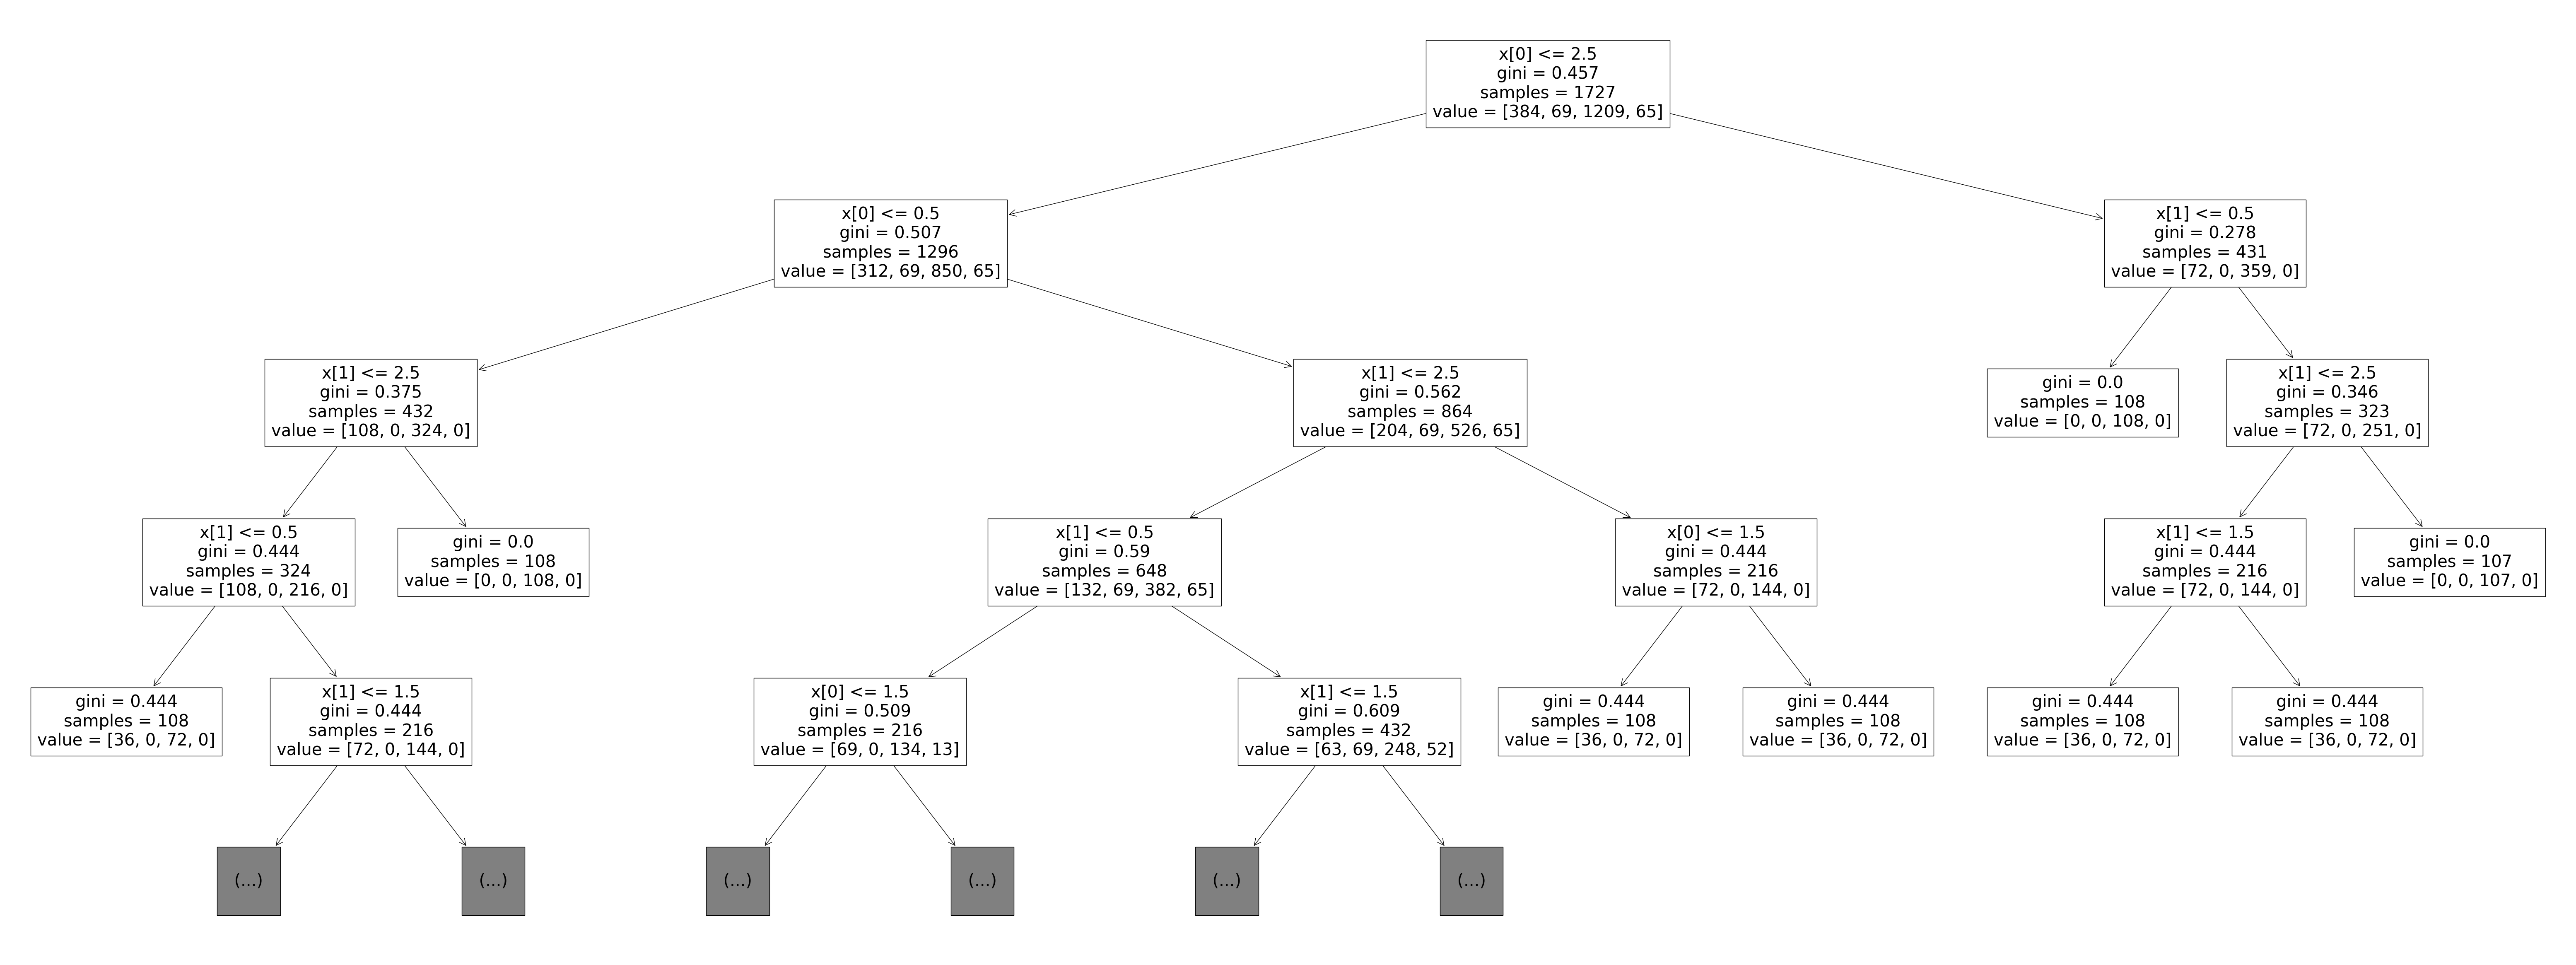

In [13]:
from sklearn.tree import plot_tree
plt.figure(figsize=(80,30))
plot_tree(model,max_depth=4)

<Axes: xlabel='vhigh', ylabel='vhigh.1'>

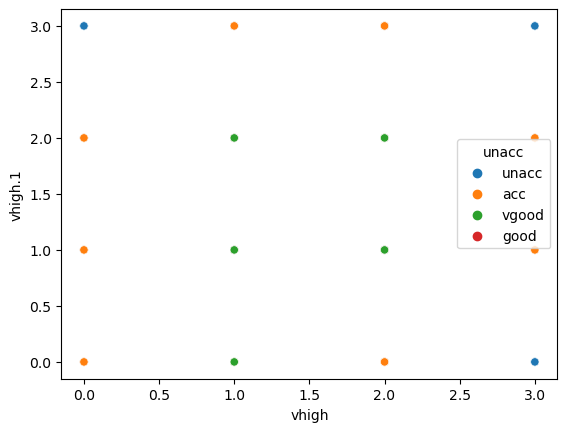

In [11]:
sns.scatterplot(x=car_df['vhigh'],y=car_df['vhigh.1'],hue=car_df['unacc'])